# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
print(temp.info())

# City of type 'object' (string)
# State of type 'object' (string)
# Temperature of type float

print(temp['City'].unique())
print(temp['State'].unique())
temp.columns = ['City', 'State', 'Temperature']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes
None
['NYC' 'Albany' 'Buffalo' 'Hartford' 'Bridgeport' 'Treton' 'Newark']
['New York' 'Connecticut' 'New Jersey']


#### Select the rows where state is New York

In [5]:
print(temp[(temp.State=='New York')])

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
print(f'The average temperature is: {temp.Temperature.values.sum() / temp.Temperature.count():.2f}')

The average temperature is: 15.16


#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[(temp.Temperature > 15)][['City', 'State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp[(temp.Temperature > 15)][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp[((temp.Temperature > 15) & (temp.Temperature < 20))][['City']]

,City
0,NYC
3,Hartford


In [10]:
temp['State'].value_counts()

New York       3
Connecticut    2
New Jersey     2
Name: State, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
for state in temp.State.unique():
    mean_temp = temp[(temp.State == state)][['Temperature']].values.mean()
    std_temp = temp[(temp.State == state)][['Temperature']].values.std()
    print(f'For the state of {state}, the mean temperature was {mean_temp:.2f} and the standard deviation was {std_temp:.2f} ')

For the state of New York, the mean temperature was 10.74 and the standard deviation was 6.64 
For the state of Connecticut, the mean temperature was 15.83 and the standard deviation was 1.39 
For the state of New Jersey, the mean temperature was 21.11 and the standard deviation was 1.11 


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
employee.sample(5)

,Name,Department,Education,Gender,Title,Years,Salary
6,Carlos,IT,Master,M,VP,8,70
0,Jose,IT,Bachelor,M,analyst,1,35
8,Ana,HR,Master,F,VP,8,70
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


In [15]:
employee.shape

(9, 7)

In [16]:
print(f'Education: {employee.Education.unique()}')
print(f'Department: {employee.Department.unique()}')
print(f'Title: {employee.Title.unique()}')

Education: ['Bachelor' 'Master' 'Phd']
Department: ['IT' 'HR' 'Sales']
Title: ['analyst' 'associate' 'VP']


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

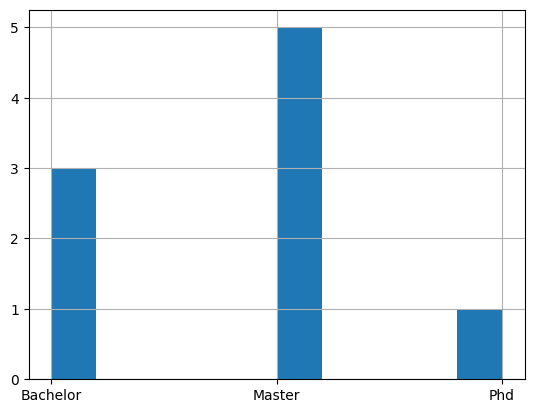

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ed = employee.Education
ed.hist()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

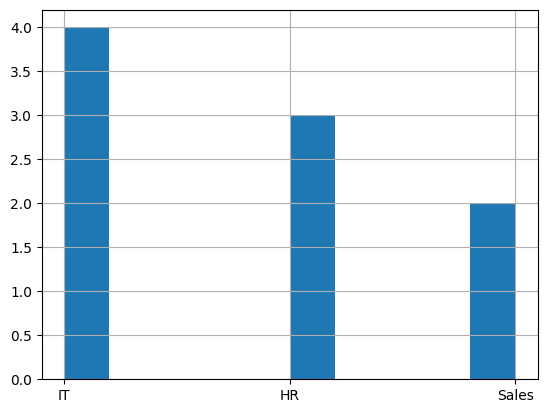

In [18]:
dd = employee.Department
dd.hist()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

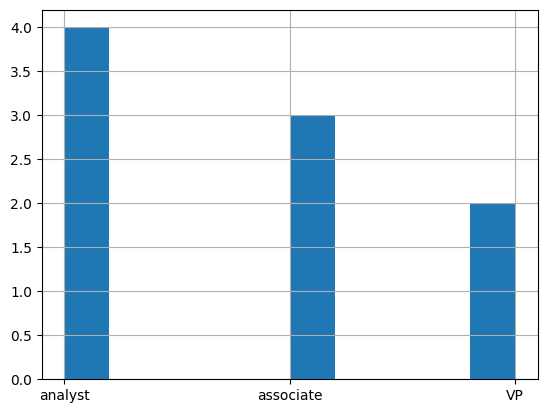

In [19]:
dd = employee.Title
dd.hist()
plt.show

#### What's the average salary in this company?

In [20]:
print(f'The average salary is ${employee.Salary.values.mean():.0f}k.')

The average salary is $49k.


#### What's the highest salary?

In [21]:
print(f'The highest salary is ${employee.Salary.values.max():.0f}k.')

The highest salary is $70k.


#### What's the lowest salary?

In [22]:
print(f'The lowest salary is ${employee.Salary.values.min():.0f}k.')

The lowest salary is $30k.


#### Who are the employees with the lowest salary?

In [23]:
lp = employee[(employee.Salary < employee.Salary.values.mean())]
# print(f'The lowest paid employees are ${employee.Salary.values.min():.0f}k.')
lp

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Could you give all the information about an employee called David?

In [24]:
eDavid = employee[(employee.Name == 'David')]
eDavid

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [25]:
salaryDavid = employee[(employee.Name == 'David')][['Salary']]
salaryDavid

,Salary
2,30


#### Print all the rows where job title is associate

In [26]:
associateEmployees = employee[(employee.Title == 'associate')]
associateEmployees

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
employee.loc[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [28]:
employee.iloc()[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [29]:
senior_associates = employee[((employee.Title == 'associate') & (employee.Salary > 55))]
senior_associates


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [30]:
employee.groupby(by=employee.Years)[['Salary']].mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [31]:
employee.groupby(by=employee.Title)[['Salary']].mean()

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

In [32]:
employee.sample(5)

,Name,Department,Education,Gender,Title,Years,Salary
5,Eva,Sales,Bachelor,F,associate,2,55
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
0,Jose,IT,Bachelor,M,analyst,1,35
6,Carlos,IT,Master,M,VP,8,70


<Axes: title={'center': 'Salary'}, xlabel='Department'>

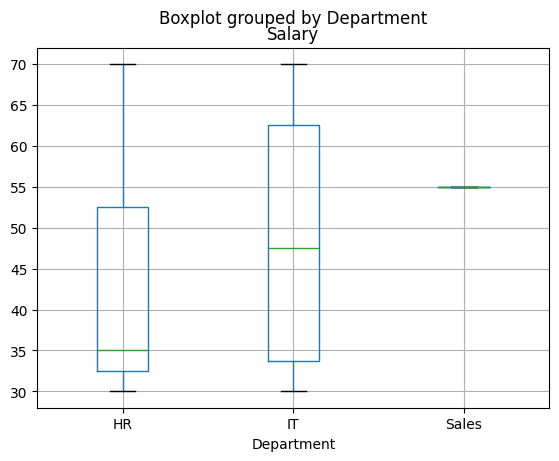

In [33]:
employee.boxplot(column=['Salary'], by='Department')

<Axes: title={'center': 'Salary'}, xlabel='Education'>

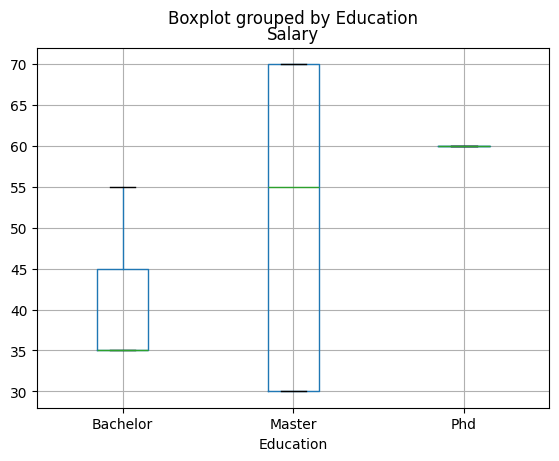

In [34]:
employee.boxplot(column=['Salary'], by='Education')

<Axes: title={'center': 'Salary'}, xlabel='Years'>

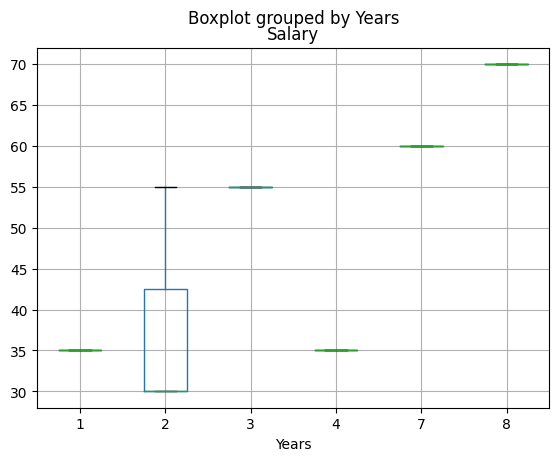

In [35]:
employee.boxplot(column=['Salary'], by='Years')

In [36]:
employee[['Salary']].quantile(.25)

Salary    35.0
Name: 0.25, dtype: float64

In [37]:
employee[['Salary']].quantile(.75)

Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [38]:
meanF = employee[(employee.Gender == 'F')][['Salary']].values.mean()
meanM = employee[(employee.Gender == 'M')][['Salary']].values.mean()
print(f'The mean salary for Females was {meanF}, while for males was {meanM}')

The mean salary for Females was 47.5, while for males was 50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [39]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


In [40]:
print(employee[['Salary', 'Years']].describe())

          Salary     Years
count   9.000000  9.000000
mean   48.888889  4.111111
std    16.541194  2.803767
min    30.000000  1.000000
25%    35.000000  2.000000
50%    55.000000  3.000000
75%    60.000000  7.000000
max    70.000000  8.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [41]:
# 1.
print('1.\n')
for dept in employee.Department.unique():
    minSalary = employee[(employee.Department==dept)][['Salary']].min()
    # meanSalary = employee[(employee.Department==dept)][['Salary']].mean()
    maxSalary = employee[(employee.Department==dept)][['Salary']].max()
    print(f'For the {dept} department the diff. between max and min salaries is: {maxSalary - minSalary}')

# 2.
print('\n2.\n', employee.groupby(by=employee.Department)[['Salary']].agg(func='max') - employee.groupby(by=employee.Department)[['Salary']].agg(func='min'))

# 3. 
print('\n3.\n')
def calc_diff(df:pd.DataFrame)-> int :    
    return df.Salary.max() - df.Salary.min()
print(employee.groupby(by=employee.Department).apply(func= calc_diff))

# 3.b
print('\n3.b\n')
print(employee.groupby(by=employee.Department).apply(func= lambda df: df.Salary.max() - df.Salary.min() ))

1.

For the IT department the diff. between max and min salaries is: Salary    40
dtype: int64
For the HR department the diff. between max and min salaries is: Salary    40
dtype: int64
For the Sales department the diff. between max and min salaries is: Salary    0
dtype: int64

2.
             Salary
Department        
HR              40
IT              40
Sales            0

3.

Department
HR       40
IT       40
Sales     0
dtype: int64

3.b

Department
HR       40
IT       40
Sales     0
dtype: int64


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [42]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [43]:
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
33572,54613,540968,21165,2011,1,3,13,beware of the cat metal sign,2,2011-01-12 13:40:00,1.69,17338,United Kingdom,3.38
367065,497775,578472,82484,2011,11,4,12,wood black board ant white finish,4,2011-11-24 12:40:00,7.95,12476,Germany,31.80
372648,504918,578996,20718,2011,11,7,16,red retrospot shopper bag,10,2011-11-27 16:02:00,1.25,13991,United Kingdom,12.50
375445,508281,579196,22847,2011,11,1,15,bread bin diner style ivory,1,2011-11-28 15:54:00,33.29,14096,United Kingdom,33.29
211905,301619,563349,84692,2011,8,1,13,box of 24 cocktail parasols,1,2011-08-15 13:51:00,0.42,14623,United Kingdom,0.42


In [44]:
print(orders.shape)
print(orders.columns)

(397924, 14)
Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')


####  What is the average Purchase Price?

In [45]:
print(orders.groupby(by=orders.InvoiceNo).apply(func= lambda df: df.Quantity * df.UnitPrice ).mean())

22.394748504739596


#### What were the highest and lowest purchase prices? 

In [46]:
# highest
print(orders.groupby(by=orders.InvoiceNo).apply(func= lambda df: df.Quantity * df.UnitPrice ).max())

168469.6


In [47]:
# lowest
print(orders.groupby(by=orders.InvoiceNo).apply(func= lambda df: df.Quantity * df.UnitPrice ).min())

0.0


#### Select all the customers we have in Spain

In [48]:
esCustomers = orders[(orders.Country == 'Spain')]
esCustomers

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [49]:
len(esCustomers.CustomerID.value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [50]:
proCustomers = orders[(orders.Quantity > 50)]
proCustomers

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [51]:
bigEsOrders = orders[((orders.Country=='Spain') & (orders.Quantity > 50))]
bigEsOrders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [52]:
freeOrders = orders[(orders.amount_spent==0)]
freeOrders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [53]:
lunchBagOrders = orders[(orders.Description.apply(func = lambda desc: 'lunch bag' in desc))]
lunchBagOrders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [54]:
lunchBagOrders11 = lunchBagOrders[(lunchBagOrders.InvoiceDate.apply(func = lambda invoiceDate: '2011' in invoiceDate))]
lunchBagOrders11

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [55]:
esCustomers[['amount_spent']].describe()

,amount_spent
count,2485.000000
mean,24.779521
std,70.336782
min,0.000000
25%,9.950000
50%,15.000000
75%,19.800000
max,1350.000000


#### Select all orders made in the month of August

In [56]:
# 1. 
# Using str method, without converting the column to datetime
# orders[(orders.InvoiceDate.apply(func = lambda desc: '-08-' in desc))]

# 2.
# Converting the column to datetime and checking if the month == 8 (August)
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)
augustOrders = orders[(orders.InvoiceDate.dt.month==8)]
augustOrders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [57]:
augustCountries = augustOrders.groupby(augustOrders.Country)
augustCountries.Country.value_counts()

Country          Country        
Australia        Australia            107
Austria          Austria               88
Belgium          Belgium              194
Canada           Canada                 5
Channel Islands  Channel Islands      140
Denmark          Denmark               16
EIRE             EIRE                 593
Finland          Finland               61
France           France               569
Germany          Germany              795
Iceland          Iceland               22
Israel           Israel               171
Italy            Italy                 95
Malta            Malta                 55
Netherlands      Netherlands          280
Norway           Norway                77
Poland           Poland                17
Portugal         Portugal              41
Spain            Spain                252
Sweden           Sweden                40
Switzerland      Switzerland          267
United Kingdom   United Kingdom     23105
Unspecified      Unspecified           23
N

#### What's the  average amount of money spent by country

In [58]:
countryOrders = orders.groupby(orders.Country)
countryOrders.amount_spent.mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [59]:
mostExpensive = orders.UnitPrice.max()
orders[(orders.UnitPrice == mostExpensive)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [60]:
# your answer here
for year in orders.InvoiceDate.dt.year.unique():
    print(f'For the year {year} the average amount spent was { orders[(orders.InvoiceDate.dt.year==year)].amount_spent.mean() }')

For the year 2010 the average amount spent was 21.892732798165138
For the year 2011 the average amount spent was 22.43007395552017
